## Unsupervised Machine Learning - Using KMeans on Iris-Dataset

KMeans Algorithm Steps:
* Choose the number of Cluster
* Specify the Cluster seeds(Starting Centroid)
* Assign each point to a centroid
* Adjust the centroids
* Repaet the last two steps again and again till it can't be reassign.

Here, We use KMeans Algorthim from sklearn libraries 

## Importing Relevant Library

In [1]:
# importing Relevant libraries
import numpy as np # Mathematical tool
import pandas as pd # Data manipulation tool
import matplotlib.pyplot as plt # Data Visulization tool
from seaborn import scatterplot # Advance data visuilzation tool
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Mount the Drive from datasets
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Loading the data

In [3]:

raw_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/The Spark Foundation-GRIP/Iris.csv', index_col=0)
raw_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Exploring the data

In [4]:
# Checking the info of data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
# Checking for the null value
raw_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
#Looking the number of different species
raw_data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

Text(0, 0.5, 'Sepal Width')

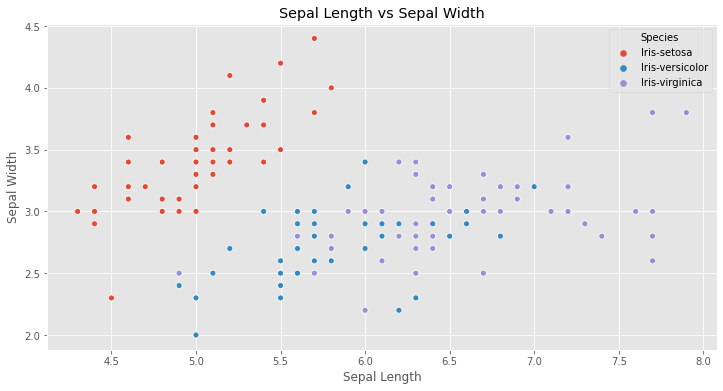

In [22]:
# Exploring the available data of Sepal, with seaborn scatterplot
fig = plt.figure(figsize=(12,6))
scatterplot(x = raw_data['SepalLengthCm'], y = raw_data['SepalWidthCm'], hue = raw_data['Species'])
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Text(0, 0.5, 'Petal Width')

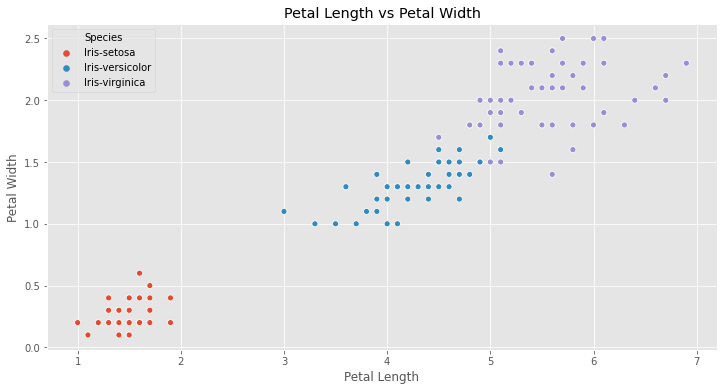

In [23]:
# Exploring the available data of Petal, with seaborn scatterplot
plt.figure(figsize=(12,6))
scatterplot(x = raw_data['PetalLengthCm'], y = raw_data['PetalWidthCm'],hue=raw_data['Species'])
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

## Creating the Model

In [9]:
# Import the KMeans Module from sklearn
from sklearn.cluster import KMeans

In [10]:
# Check Point
df = raw_data.copy()
x_features = df.iloc[:,:-1]

### Selecting the optimum number of clusters

Text(0, 0.5, 'WCSS(Within-Cluster-Sum-of-Squares')

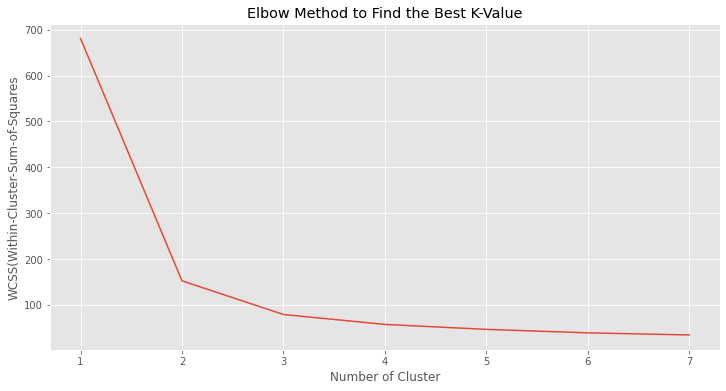

In [21]:
# Using the Elbow method to find the best k-value
wcss = []
# Checking by Assuming maximum Cluster 8
for n_cluster in range(1,8):
  kmC = KMeans(n_cluster)
  kmC.fit(x_features)
  wcss.append(kmC.inertia_)
plt.figure(figsize=(12,6))
plt.style.use('ggplot')
plt.plot(list(range(1,8)),wcss)
plt.title('Elbow Method to Find the Best K-Value')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS(Within-Cluster-Sum-of-Squares')

Hence, Taking the Number of Cluster - 3 as optimum.

### Applying the K-Means Clustering Algorthim

In [12]:
km = KMeans(3)
km.fit(x_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Predicting the different cluster

In [13]:
# Predicting the Cluster
pred = km.predict(x_features)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [14]:
# Adding the dataframe
df['Cluster'] = pred
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1


### Looking the Centroids of all 3 Clusters

In [15]:
# Centroids
Centroids = km.cluster_centers_

In [16]:
Centroids

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

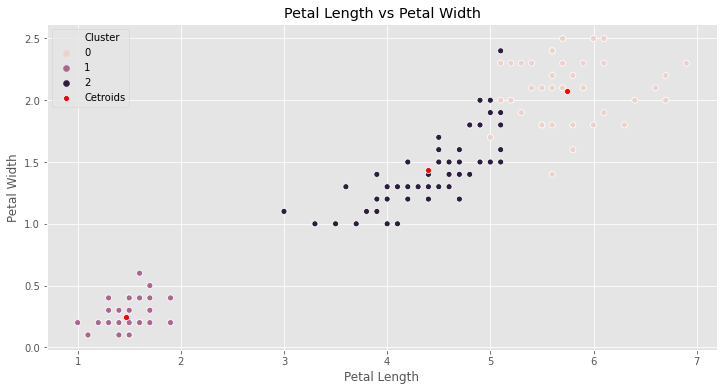

In [19]:
# Plotting the Predicted Cluster on Petal length and width, with seaborn scatterplot

plt.figure(figsize=(12,6))
scatterplot(x = df['PetalLengthCm'], y = df['PetalWidthCm'], hue=df['Cluster'])
scatterplot(Centroids[:,2],Centroids[:,3],color='Red', label='Cetroids')
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

Text(0, 0.5, 'Sepal Width')

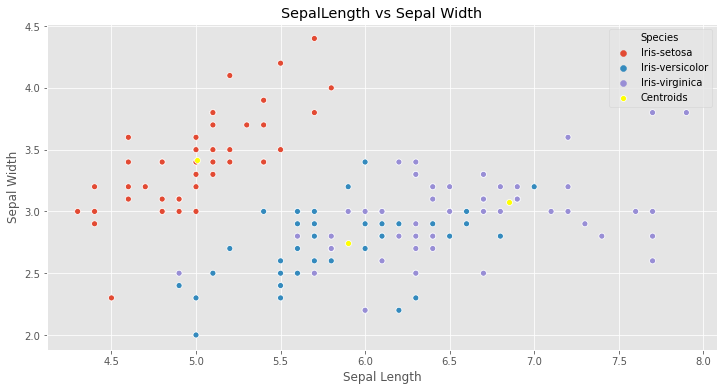

In [20]:
# Plotting the Predicted Cluster on Sepal length and width, with seaborn scatterplot

plt.figure(figsize=(12,6))
scatterplot(x = df['SepalLengthCm'], y = df['SepalWidthCm'], hue=df['Species'])
scatterplot(Centroids[:,0],Centroids[:,1],color='yellow',label='Centroids')
plt.title('SepalLength vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')